# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
import requests

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [2]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [3]:
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


#### Test dataset


In [4]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [5]:
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


#### Sample submission

In [6]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [7]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

In [8]:
train_dataset['10'].value_counts()

Marcus           5107
Clarius          2362
Philippus        1360
Coronavirucus    1009
Mongucus          640
Paithonius        600
Ubuntius          512
Esequlius         427
Name: 10, dtype: int64

In [9]:
# Just a basic check over the data... to see the range of the variables and their variations
# 
train_dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,0.021280,0.030684,-0.000379,-0.022127,0.006801,-0.001279,0.032540,-0.006720,-0.011368,-0.026942
std,1.004481,3.661030,1.072319,1.002045,0.963679,1.108192,1.245215,1.012995,1.085821,0.985799
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.006326,-0.555747,-0.372457,-0.528135
50%,0.056229,-0.055704,0.214288,0.080127,0.261718,-0.058835,0.220177,0.101115,0.064084,-0.053548
75%,0.216699,0.203385,0.349432,0.601905,0.261718,0.522513,0.446679,0.646377,0.500624,0.491862
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


In [10]:
# separate the data for test....
from sklearn.model_selection import train_test_split
cols=[str(col) for col in [*list(range(10))]]

X=train_dataset[[*cols]]
y=train_dataset['10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

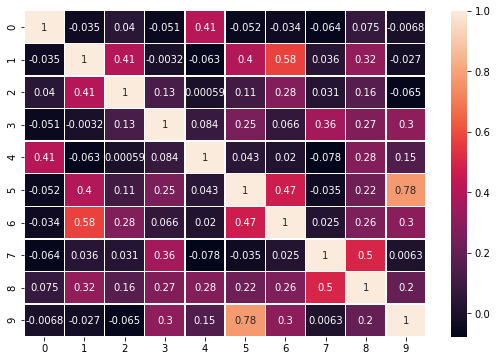

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(X.corr(), annot=True,  linewidths=.5, ax=ax)

### `Logistic`

In [12]:
# begin with the traditional ... Logistic
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict=clf.predict(X_train)

accerted=y_predict==y_train
sum(accerted)/len(y_train)

0.5691300488237905

In [13]:
#as we can see it is not so good...
y_predict=clf.predict(X_test)
accerted=y_predict==y_test
sum(accerted)/len(y_test)

0.5630615640599002

### `Kmean Section`

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(X_train)
y_predict=kmeans.predict(X_test)

In [15]:
k_analysis=pd.DataFrame({'y_real':list(y_test),'y_estimada':list(y_predict)})
pd.crosstab(k_analysis['y_real'],k_analysis['y_estimada'])

y_estimada,0,1,2,3,4,5,6,7
y_real,,,,,,,,
Clarius,89,22,24,8,324,11,113,3
Coronavirucus,18,29,14,8,91,2,96,0
Esequlius,24,5,19,0,38,0,16,0
Marcus,322,78,95,67,360,3,341,10
Mongucus,12,7,14,4,8,0,117,0
Paithonius,19,16,0,0,84,1,29,0
Philippus,53,19,27,9,119,3,107,2
Ubuntius,18,8,0,0,81,0,18,0


In [16]:
# as we can see this kmean don't clasiffy properly ....;( .. but we can change the numbers of clusters...
# in order to create a new variable and then include this variable in a model...

In [17]:
res=[]
for clu in range(8,40):
    kmeans = KMeans(n_clusters=clu, random_state=0).fit(X_train)
    y_predict=kmeans.predict(X_test)
    k_analysis=pd.DataFrame({'y_real':list(y_test),'y_estimada':list(y_predict)})
    result=pd.crosstab(k_analysis['y_real'],k_analysis['y_estimada'])
    res.append((clu,result.sum().max()))

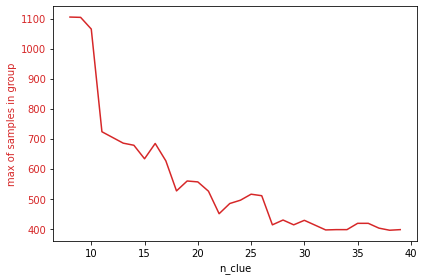

In [18]:
x_clu=[ele[0] for ele in res]
y_max=[ele[1] for ele in res]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('n_clue')
ax1.set_ylabel('max of samples in group', color=color)
ax1.plot(x_clu, y_max, color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

In [19]:
# Given the previuos graph we consider that 18 cluster generated by kmean algorith 
# will give more information than others.. 

### `DB_scan section`

In [20]:
from sklearn.cluster import DBSCAN
dbscan_cluster = DBSCAN().fit(X_train)


In [21]:
epss=list(np.array(range(1,40,1))/10)
res=[]
for ep in epss:
    dbscan_cluster = DBSCAN(eps=ep).fit(X_train)
    db_analysis=pd.DataFrame({'y_real':list(y_train),'y_estimada':list(dbscan_cluster.labels_)})
    result=pd.crosstab(db_analysis['y_real'],db_analysis['y_estimada'])
    res.append((ep,result[-1].sum(),len(result.columns)))

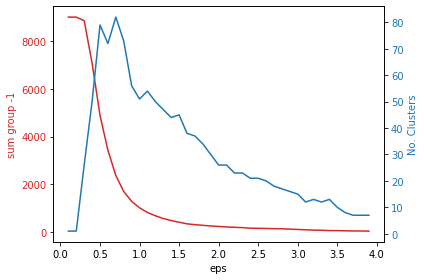

In [22]:
x_ep=[ele[0] for ele in res]
y_sum=[ele[1] for ele in res]
n_columns=[ele[2] for ele in res]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('eps')
ax1.set_ylabel('sum group -1', color=color)
ax1.plot(x_ep, y_sum, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('No. Clusters', color=color)  
ax2.plot(x_ep, n_columns, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [23]:
# the superior graph shows how decreace the sum of -1 column when increment the eps parameter... 
# also show the numbers of groups that create.. There are two interesting values for eps: 0.7 and 1.1


### `The mix`

we are going to add the label generated by kmean and db_scan and use a logistic to estimate.... 

In [24]:
kmeans = KMeans(n_clusters=18, random_state=0).fit(X_train)
k_label=kmeans.predict(X_train)
dbscan_cluster = DBSCAN(eps=0.7).fit(X_train)
db_scan_label=dbscan_cluster.labels_
X_train_up=X_train
X_train_up['k_label']=k_label
X_train_up['db_scan_label']=db_scan_label

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
clf=LogisticRegression(random_state=0).fit(X_train_up, y_train)
y_predict=clf.predict(X_train_up)

accerted=y_predict==y_train

/home/ytorres/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
accerted.sum()/len(y_predict)

0.5745672436750998

In [27]:
# it doesn't work ;(...

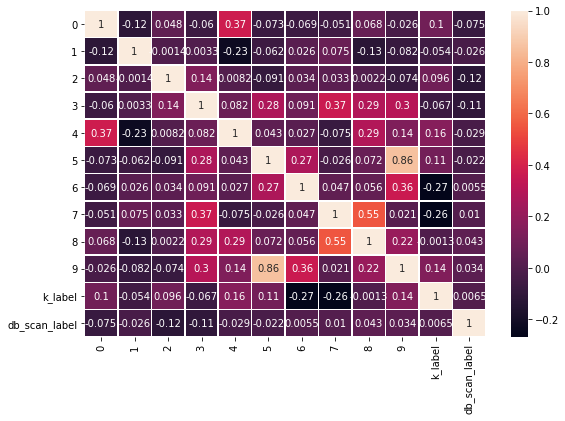

In [28]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(X_train_up.corr(), annot=True,  linewidths=.5, ax=ax)

In [34]:
X_train=X_train.drop(columns=['k_label','db_scan_label'])    

### `kmean over DB_scan?`

In [97]:
# we are going to extract a "cluster from DB_scan" and the apply kmean
# lets evaluate from various values of eps

epss=[0.3,0.5,0.7,0.9,1.1,1.3]
res=[]
for ep in epss:
    dbscan_cluster = DBSCAN(eps=ep).fit(X_train)
    kmeans = KMeans(n_clusters=8, random_state=0).fit(pd.concat([X_train.reset_index(),pd.DataFrame({'db_scan_label':dbscan_cluster.labels_})],axis=1))
    y_predict=kmeans.predict(pd.concat([X_train.reset_index(),pd.DataFrame({'db_scan_label':dbscan_cluster.labels_})],axis=1))
    db_analysis=pd.DataFrame({'y_real':list(y_train),'y_estimada':list(y_predict)})
    result=pd.crosstab(db_analysis['y_real'],db_analysis['y_estimada'])
    res.append(np.diag(result).sum())

In [96]:
res

[1137, 1137, 1137, 1137, 1137, 1137]

### ´ Bayesian`

In [35]:
from sklearn.naive_bayes import CategoricalNB

model=CategoricalNB()
X_train_mod=X_train-X_train.min() # dont like this kind of modification.. but was neccesary for the algorith
model.fit(X_train_mod,y_train)
y_predict=model.predict(X_train_mod)
accerted=y_predict==y_train
accerted.sum()/len(y_predict)

0.5816688859298713

In [36]:
accerted

2915     True
398      True
2254    False
6948    False
8308     True
        ...  
194      True
6144    False
7236     True
9727     True
4579     True
Name: 10, Length: 9012, dtype: bool

### `One vs Rest`

In [37]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC()).fit(X_train, y_train)
y_predict=model.predict(X_test)

array(['Marcus', 'Marcus', 'Marcus', ..., 'Marcus', 'Marcus',
       'Paithonius'], dtype='<U13')

In [39]:
accerted=y_predict==y_test
accerted.sum()/len(y_predict)

0.7148086522462562

In [40]:
# it has been the best.. could it be improved by adding variables?

In [44]:
model_svc = OneVsRestClassifier(SVC()).fit(X_train_up, y_train)
y_predict_up=model_svc.predict(X_train_up)
accerted=y_predict_up==y_train
accerted.sum()/len(y_predict_up)

0.606635596981802

### `One vs one`

In [60]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
model_oo=OneVsOneClassifier(SVC()).fit(X_train, y_train)
y_predict=model_oo.predict(X_test)

In [61]:
accerted=y_predict==y_test
accerted.sum()/len(y_predict)

0.7214642262895175

In [62]:
model_oo2 = OneVsOneClassifier(SVC()).fit(X_train_up, y_train)
y_predict_up=model_oo2.predict(X_train_up)
accerted=y_predict_up==y_train
accerted.sum()/len(y_predict_up)

0.5800044385264093

### `Gradient boosting..`

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7071547420965059

### `histgradiente...`

In [102]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.9996672212978369

In [103]:
clf = HistGradientBoostingClassifier().fit(X, y)
y_predict_test=clf.predict(test_dataset)

## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [104]:
df_y=pd.DataFrame(y_predict_test)
df_y.to_csv('../data/predict.csv',header=False)

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [105]:
my_submission = "../data/predict.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.9997503744383425,
 'quote': "AWESOME! A-W-E-S-O-M-E! Amazing score!!! So cool! I can't even... But wait, maybe...too good to be true? Overfit much?",
 'tip': 'If you think you may have overfitted your model, visit http://apila-bible.herokuapp.com/check/overfit on your browser for some follow up. ;)'}

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)